#IMPORT LIBRARIES AND DATASET


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


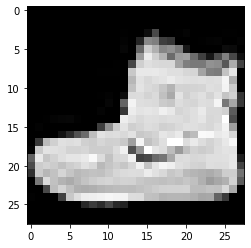

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [ ]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

#PERFORM DATA VISUALIZATION

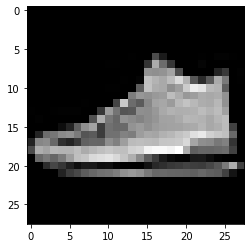

In [ ]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap='gray')

In [ ]:
label = y_train[i]
label

7

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')



NameError: ignored

# PERFORM DATA PREPROCESSING

In [ ]:
# normalize data
X_train = X_train/255
X_test = X_test/255
#ukg

In [ ]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [ ]:
noise_dataset = np.array(noise_dataset)

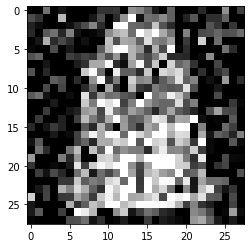

In [ ]:
plt.imshow(noise_dataset[22], cmap='gray')

In [ ]:
# add noise to testing dataset
noise_factor = 0.3

noise_test_dataset = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [ ]:
noise_test_dataset = np.array(noise_test_dataset)

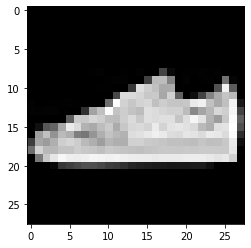

In [ ]:
plt.imshow(X_test[22], cmap='gray')

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))#, input_shape=(28, 28, 1)))

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same'))#, input_shape=(28, 28, 1)))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))#, input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same'))#, input_shape=(28, 28, 1)))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 4,953
Trainable params: 4,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 484us/sample - loss: 0.3835 - val_loss: 0.3202
Epoch 2/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.3116 - val_loss: 0.3101
Epoch 3/10
60000/60000 [==============================] - 30s 502us/sample - loss: 0.3053 - val_loss: 0.3061
Epoch 4/10
60000/60000 [==============================] - 30s 503us/sample - loss: 0.3029 - val_loss: 0.3041
Epoch 5/10
60000/60000 [==============================] - 30s 503us/sample - loss: 0.3014 - val_loss: 0.3032
Epoch 6/10
60000/60000 [==============================] - 30s 505us/sample - loss: 0.3005 - val_loss: 0.3021
Epoch 7/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.2998 - val_loss: 0.3017
Epoch 8/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.2994 - val_loss: 0.3013
Epoch 9/10
60000/60000 [==============================] - 31s 510us/sample - l

#EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Loss : {:.3f}'.format(evaluation))

10000/10000 [==============================] - 3s 278us/sample - loss: 0.3009
Test Loss : 0.301


In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

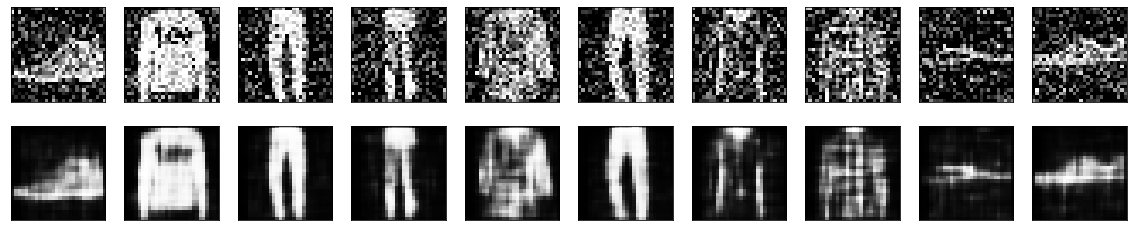

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot